In [ ]:
library(readxl)
library(ggplot2) 
dplyr::lag(1:5, 2) 
library(dplyr)
library(tidyr)
library(olsrr)
library(leaps)

[1] NA NA  1  2  3

In [ ]:
coachdata <- read.csv("C:/Users/trent/OneDrive/Documents/Repositories/NHL-Regression-Analysis-R/data/game_teams_stats.csv")
View(coachdata)

game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>
2017030417,54,home,FALSE,tbc,NA,0,0,0,0,0,0,0.0,0,0,0,NA
2017030417,15,away,FALSE,tbc,NA,0,0,0,0,0,0,0.0,0,0,0,NA
2017030416,54,away,FALSE,tbc,NA,0,0,0,0,0,0,0.0,0,0,0,NA
2017030416,15,home,FALSE,tbc,NA,0,0,0,0,0,0,0.0,0,0,0,NA
2017030415,54,home,FALSE,REG,Gerard Gallant,3,31,39,12,2,1,52.5,15,22,11,NA
2017030415,15,away,TRUE,REG,Barry Trotz,4,33,27,8,4,1,47.5,6,10,13,NA
2017030414,54,away,FALSE,REG,Gerard Gallant,2,30,39,32,4,0,51.6,7,8,8,left
2017030414,15,home,TRUE,REG,Barry Trotz,6,23,29,20,5,3,48.4,18,18,24,left
2017030413,54,away,FALSE,REG,Gerard Gallant,1,22,31,8,2,0,37.1,7,10,9,left


In [ ]:
coachdata<- coachdata %>%
  filter(!is.na(goals) & !is.na(shots)) %>%
  mutate(
    season_start = as.integer(substr(game_id, 1, 4)),
    game_type = substr(game_id, 5, 6)
  ) %>%
  filter(game_type == "02") %>%
  group_by(season_start, team_id) %>%
  arrange(game_id) %>%
  mutate(game_index = row_number()) %>%
  ungroup()

game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,season_start,game_type,game_index
<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>
2000020001,25,home,FALSE,OT,Ken Hitchcock,2,21,NA,22,9,1,NA,NA,NA,NA,left,2000,02,1
2000020001,21,away,FALSE,OT,Bob Hartley,2,28,NA,20,10,1,NA,NA,NA,NA,left,2000,02,1
2000020002,9,away,FALSE,OT,Jacques Martin,4,33,NA,20,6,2,NA,NA,NA,NA,right,2000,02,1
2000020002,6,home,FALSE,OT,Pat Burns,4,38,NA,12,10,2,NA,NA,NA,NA,right,2000,02,1
2000020003,16,away,FALSE,REG,Alpo Suhonen,2,21,NA,24,7,1,NA,NA,NA,NA,right,2000,02,1
2000020003,7,home,TRUE,REG,Lindy Ruff,4,30,NA,21,3,0,NA,NA,NA,NA,right,2000,02,1
2000020004,23,away,FALSE,REG,Marc Crawford,3,29,NA,16,3,0,NA,NA,NA,NA,left,2000,02,1
2000020004,4,home,TRUE,REG,Craig Ramsay,6,33,NA,8,7,3,NA,NA,NA,NA,left,2000,02,1
2000020005,20,home,FALSE,REG,Don Hay,3,21,NA,20,9,0,NA,NA,NA,NA,left,2000,02,1


In [ ]:
coachdata_halves <- coachdata %>%
  group_by(season_start, team_id) %>%
  mutate(total_games = n(),
         half = ifelse(game_index <= total_games / 2, "first", "second")) %>%
  group_by(season_start, team_id, half) %>%
  summarise(
    goals = sum(goals),
    shots = sum(shots),
    shooting_pct = goals / shots,
    games_played = n(),
    .groups = "drop"
  )  %>%
  pivot_wider(
    id_cols = c(season_start, team_id),
    names_from = half,
    values_from = c(shooting_pct, games_played),
    names_sep = "_"
  )
  coachdata_halves

season_start,team_id,shooting_pct_first,shooting_pct_second,games_played_first,games_played_second
<int>,<int>,<dbl>,<dbl>,<int>,<int>
2000,1,0.10510511,0.12321145,41,41
2000,2,0.08144796,0.08246528,41,41
2000,3,0.11578045,0.09754029,41,41
2000,4,0.09278351,0.10327456,41,41
2000,5,0.09920000,0.13723776,41,41
2000,6,0.08561644,0.10663308,41,41
2000,7,0.10373832,0.09435626,41,41
2000,8,0.08787346,0.10495050,41,41
2000,9,0.10927152,0.11181102,41,41


In [ ]:
coachdata_regression <- coachdata_halves %>%
  filter(!is.na(shooting_pct_first), !is.na(shooting_pct_second))
  coachdata_regression

season_start,team_id,shooting_pct_first,shooting_pct_second,games_played_first,games_played_second
<int>,<int>,<dbl>,<dbl>,<int>,<int>
2000,1,0.10510511,0.12321145,41,41
2000,2,0.08144796,0.08246528,41,41
2000,3,0.11578045,0.09754029,41,41
2000,4,0.09278351,0.10327456,41,41
2000,5,0.09920000,0.13723776,41,41
2000,6,0.08561644,0.10663308,41,41
2000,7,0.10373832,0.09435626,41,41
2000,8,0.08787346,0.10495050,41,41
2000,9,0.10927152,0.11181102,41,41


In [ ]:
coachdata_regression <- coachdata_regression %>%
  mutate(games_total = games_played_first + games_played_second)

season_start,team_id,shooting_pct_first,shooting_pct_second,games_played_first,games_played_second,games_total
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
2000,1,0.10510511,0.12321145,41,41,82
2000,2,0.08144796,0.08246528,41,41,82
2000,3,0.11578045,0.09754029,41,41,82
2000,4,0.09278351,0.10327456,41,41,82
2000,5,0.09920000,0.13723776,41,41,82
2000,6,0.08561644,0.10663308,41,41,82
2000,7,0.10373832,0.09435626,41,41,82
2000,8,0.08787346,0.10495050,41,41,82
2000,9,0.10927152,0.11181102,41,41,82


`geom_smooth()` using formula = 'y ~ x'


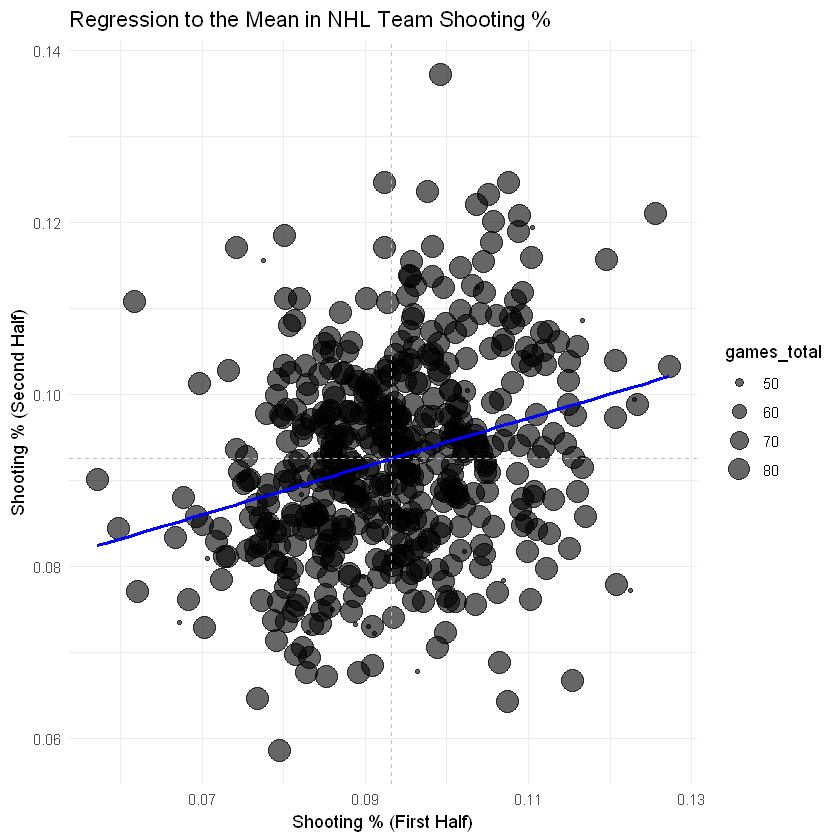

In [ ]:
ggplot(coachdata_regression, aes(x = shooting_pct_first, y = shooting_pct_second)) +
  geom_point(aes(size = games_total), alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  geom_hline(yintercept = mean(coachdata_regression$shooting_pct_second), linetype = "dashed", color = "gray") +
  geom_vline(xintercept = mean(coachdata_regression$shooting_pct_first), linetype = "dashed", color = "gray") +
  labs(
    x = "Shooting % (First Half)",
    y = "Shooting % (Second Half)",
    title = "Regression to the Mean in NHL Team Shooting %",
  ) +
  theme_minimal()


In [ ]:
model <- lm(shooting_pct_second ~ shooting_pct_first, data = coachdata_regression)
summary(model)


Call:
lm(formula = shooting_pct_second ~ shooting_pct_first, data = coachdata_regression)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.032148 -0.007280 -0.000063  0.007224  0.043014 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.066371   0.004079  16.272  < 2e-16 ***
shooting_pct_first 0.280778   0.043449   6.462 2.42e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01137 on 509 degrees of freedom
Multiple R-squared:  0.07582,	Adjusted R-squared:  0.07401 
F-statistic: 41.76 on 1 and 509 DF,  p-value: 2.417e-10


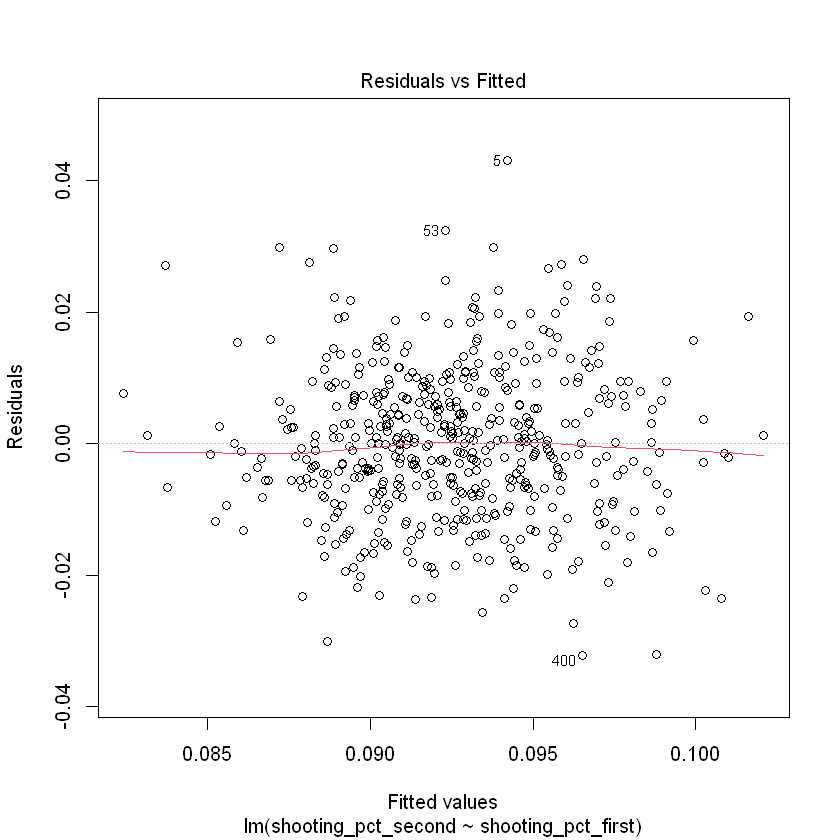

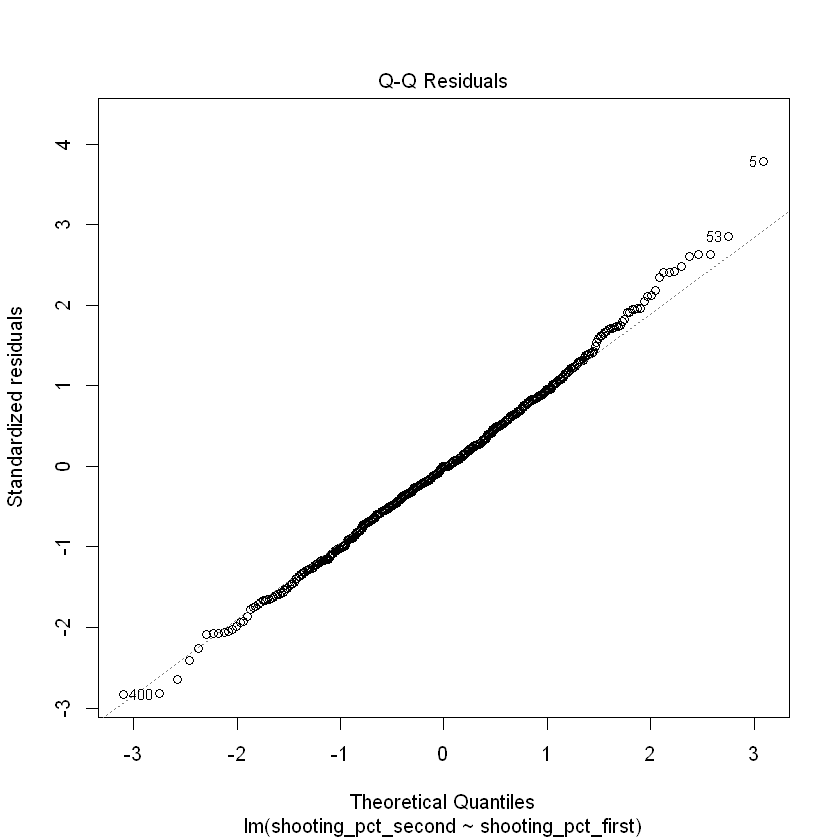

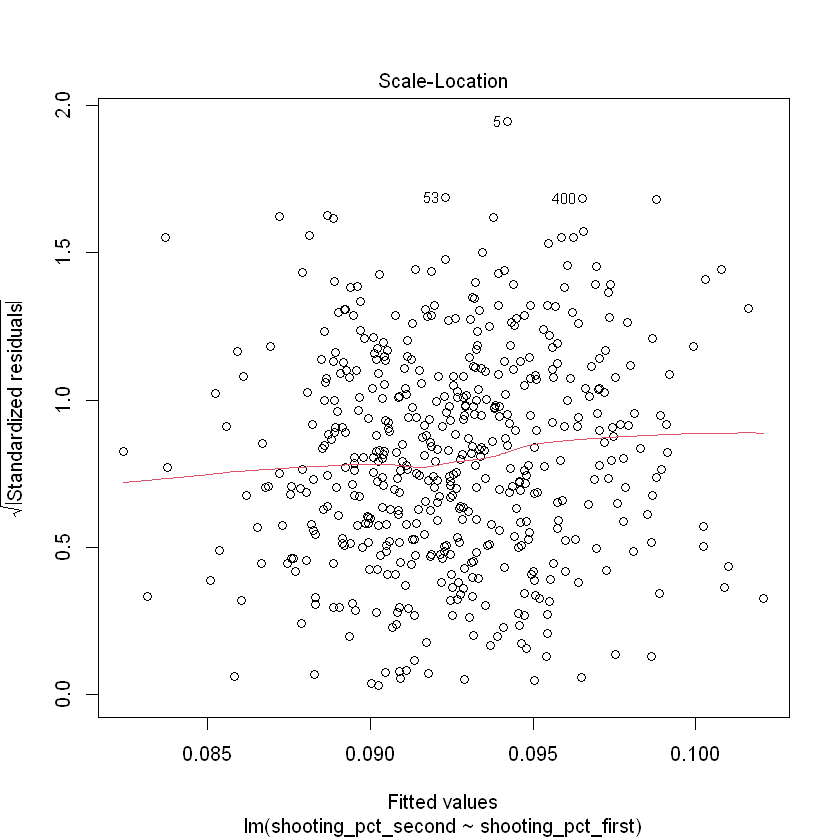

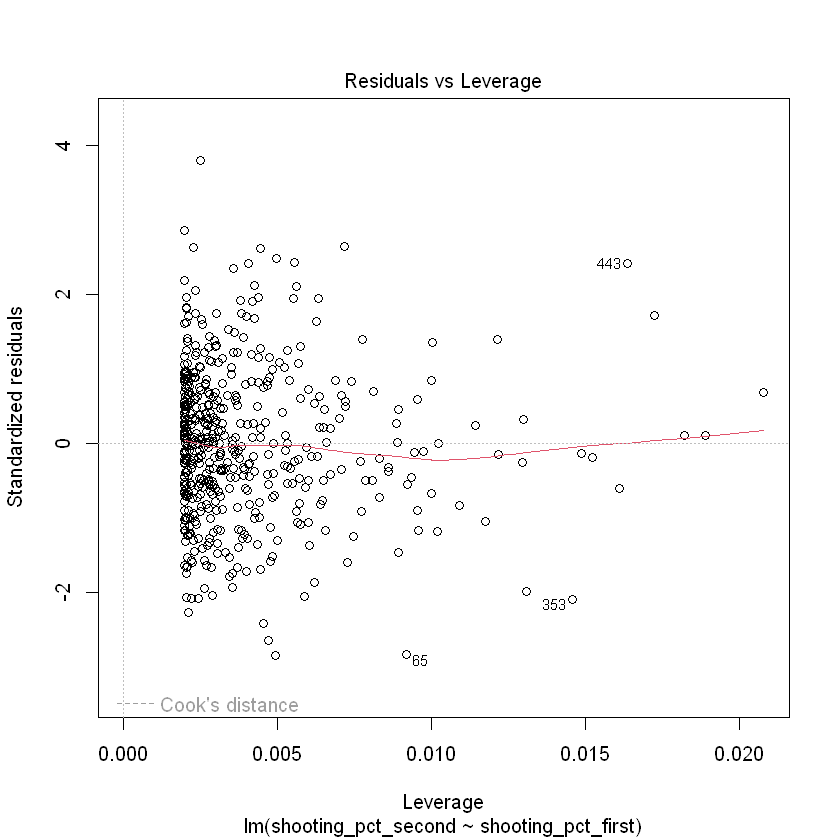

In [ ]:
plot(model)

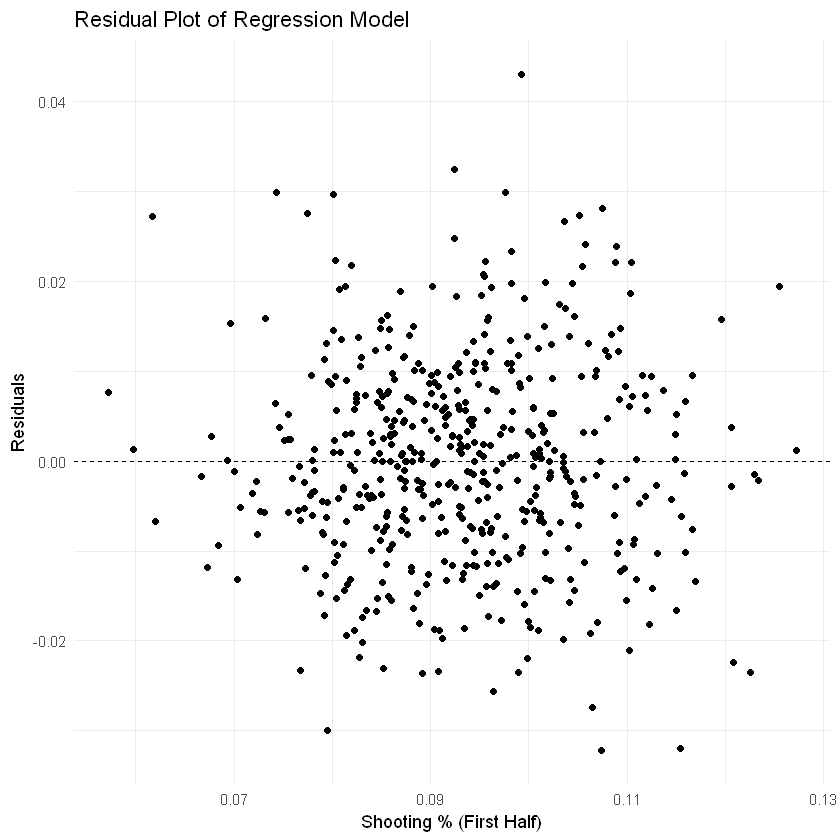

In [ ]:
coachdata_regression$residuals <- resid(model)

ggplot(coachdata_regression, aes(x = shooting_pct_first, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(
    x = "Shooting % (First Half)",
    y = "Residuals",
    title = "Residual Plot of Regression Model"
  ) +
  theme_minimal()
